In [ ]:
from sklearn.model_selection import  cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
df=pd.read_csv("diabetes.csv")
print(df.columns.tolist())
X=df.iloc[:,:8].values
y = df['Outcome'].values

sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=15)

clf=tree.DecisionTreeClassifier(max_depth=4,random_state=15)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
from sklearn import model_selection
import numpy as np
kfold=model_selection.StratifiedKFold(n_splits=5,random_state=20,shuffle=True)

train_scores=[]
test_scores=[]
k=0

for(train,test) in kfold.split(X_train,y_train):
  clf.fit(X_train[train],y_train[train])
  train_score=clf.score(X_train[train],y_train[train])
  train_scores.append(train_score)

  test_score=clf.score(X_train[test],y_train[test])

  test_scores.append(test_score)

  k+=1

  print('Fold:%s,Class dist .: %s ,Train Acc:%.3f,Test Acc:%.3f'
  %(k,np.bincount(y_train[train]),train_score,test_score))

  print('\n Train CV Accuracy :%.3f'%(np.mean(train_scores)))
  print('Test CV Accuracy :%.3f'%(np.mean(test_scores)))

Fold:1,Class dist .: [277 152] ,Train Acc:0.816,Test Acc:0.722

 Train CV Accuracy :0.816
Test CV Accuracy :0.722
Fold:2,Class dist .: [277 152] ,Train Acc:0.793,Test Acc:0.694

 Train CV Accuracy :0.804
Test CV Accuracy :0.708
Fold:3,Class dist .: [278 152] ,Train Acc:0.786,Test Acc:0.785

 Train CV Accuracy :0.798
Test CV Accuracy :0.734
Fold:4,Class dist .: [278 152] ,Train Acc:0.821,Test Acc:0.626

 Train CV Accuracy :0.804
Test CV Accuracy :0.707
Fold:5,Class dist .: [278 152] ,Train Acc:0.786,Test Acc:0.692

 Train CV Accuracy :0.800
Test CV Accuracy :0.704


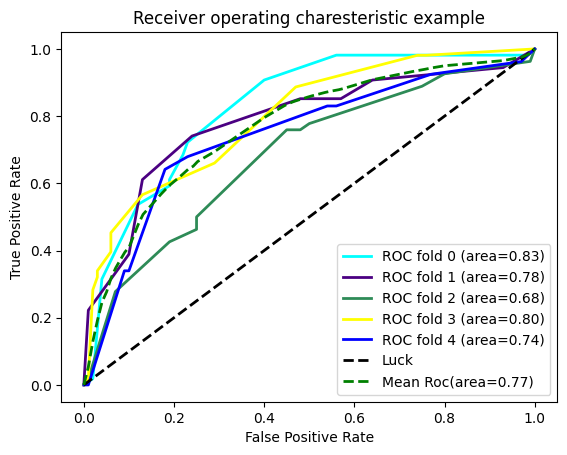

In [ ]:
from sklearn.metrics import roc_curve,auc
from itertools import cycle
import numpy as np
from matplotlib import pyplot as plt

kfold=model_selection.StratifiedKFold(n_splits=5,random_state=15,shuffle=True)

mean_tpr=0.0
mean_fpr=np.linspace(0,1,100)

colors=cycle(['cyan','indigo','seagreen','yellow','blue','red'])
lw=2

i=0
for(train,test),color in zip(kfold.split(X,y),colors):
  probas_=clf.fit(X[train],y[train]).predict_proba(X[test])

  fpr,tpr,thresholds=roc_curve(y[test],probas_[:,1])
  mean_tpr+=np.interp(mean_fpr,fpr,tpr)
  mean_tpr[0]=0.0
  roc_auc=auc(fpr,tpr)
  plt.plot(fpr,tpr,lw=lw,color=color,label='ROC fold %d (area=%0.2f)'%(i,roc_auc))
  i+=1
plt.plot([0,1],[0,1],linestyle='--',lw=lw,color='k',label='Luck')

mean_tpr/=kfold.get_n_splits(X,y)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)
plt.plot(mean_fpr,mean_tpr,color='g',linestyle='--',label='Mean Roc(area=%0.2f)'%mean_auc,lw=lw)

plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating charesteristic example')
plt.legend(loc='lower right')
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#output [TN FN
       # ​FP TP​]

[[124  29]
 [ 16  62]]
